In [30]:
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D , GlobalAveragePooling2D, concatenate, Input
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report
import seaborn as sns

In [31]:
width = 128
num_classes = 8
trainpath = './ImagesDataset/Train/'
testpath = './ImagesDataset/Test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
# print(trainpath)
# print(testpath)
print(trainImg)
print(testImg)

['./ImagesDataset/Train/BlackDot', './ImagesDataset/Train/BlackWhip', './ImagesDataset/Train/LeafBurn', './ImagesDataset/Train/RedLine', './ImagesDataset/Train/RingLeaf', './ImagesDataset/Train/RustMold', './ImagesDataset/Train/StreakMosaic', './ImagesDataset/Train/YellowLeaf']
['./ImagesDataset/Test/BlackDot', './ImagesDataset/Test/BlackWhip', './ImagesDataset/Test/LeafBurn', './ImagesDataset/Test/RedLine', './ImagesDataset/Test/RingLeaf', './ImagesDataset/Test/RustMold', './ImagesDataset/Test/StreakMosaic', './ImagesDataset/Test/YellowLeaf']


In [32]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            l = imagePath.split('/')[3] # การเข้าถึง ท่อนแบ่งด้วย /
            if l == 'BlackDot': #ใบจุดดำ
              labels.append([1,0,0,0,0,0,0,0])         
            elif l == 'BlackWhip':#แส้ดำ
              labels.append([0,1,0,0,0,0,0,0])
            elif l == 'LeafBurn':#ใบไหม้
              labels.append([0,0,1,0,0,0,0,0])
            elif l == 'RedLine':#เส้นกลางใบแดง
              labels.append([0,0,0,1,0,0,0,0])
            elif l == 'RingLeaf':#ใบจุดวงแหวน
              labels.append([0,0,0,0,1,0,0,0])
            elif l == 'RustMold':#ราสนิม
              labels.append([0,0,0,0,0,1,0,0])
            elif l == 'StreakMosaic':#ใบด่าง
              labels.append([0,0,0,0,0,0,1,0])
            elif l == 'YellowLeaf':
              labels.append([0,0,0,0,0,0,0,1])#ใบเหลือง
  return rawImgs, labels 

x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 100/100 [00:17<00:00,  5.85it/s]


In [33]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.00
x_test /= 255.00

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 128, 128, 3)
(3200, 8)
(800, 128, 128, 3)
(800, 8)


MobilenetV2

Epoch 1/10
100/100 [==============================] - 29s 257ms/step - loss: 1.1386 - accuracy: 0.8966 - val_loss: 0.2006 - val_accuracy: 0.9663
Epoch 2/10
100/100 [==============================] - 25s 247ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.4479 - val_accuracy: 0.8850
Epoch 3/10
100/100 [==============================] - 25s 247ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.3332 - val_accuracy: 0.8950
Epoch 4/10
100/100 [==============================] - 25s 247ms/step - loss: 7.0687e-04 - accuracy: 1.0000 - val_loss: 0.2805 - val_accuracy: 0.9087
Epoch 5/10
100/100 [==============================] - 25s 248ms/step - loss: 4.7251e-04 - accuracy: 1.0000 - val_loss: 0.2785 - val_accuracy: 0.9087
Epoch 6/10
100/100 [==============================] - 25s 247ms/step - loss: 3.5688e-04 - accuracy: 1.0000 - val_loss: 0.2793 - val_accuracy: 0.9087
Epoch 7/10
100/100 [==============================] - 25s 248ms/step - loss: 2.7938e-04 - accuracy: 1.0000 - val_loss:

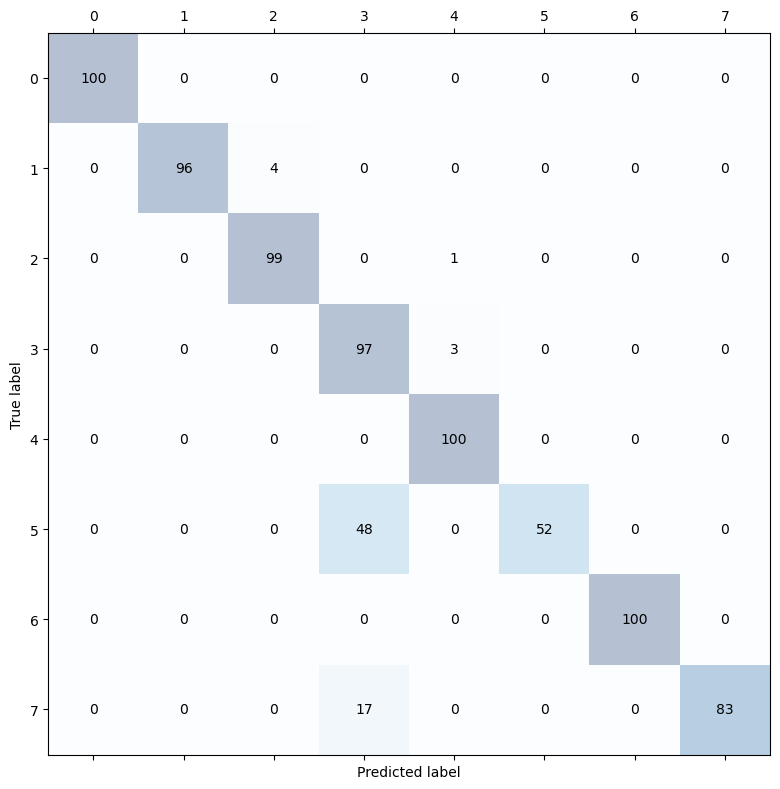

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.96      0.98       100
           2       0.96      0.99      0.98       100
           3       0.60      0.97      0.74       100
           4       0.96      1.00      0.98       100
           5       1.00      0.52      0.68       100
           6       1.00      1.00      1.00       100
           7       1.00      0.83      0.91       100

    accuracy                           0.91       800
   macro avg       0.94      0.91      0.91       800
weighted avg       0.94      0.91      0.91       800



Text(0.5, 1.0, 'Confusion Matrix')

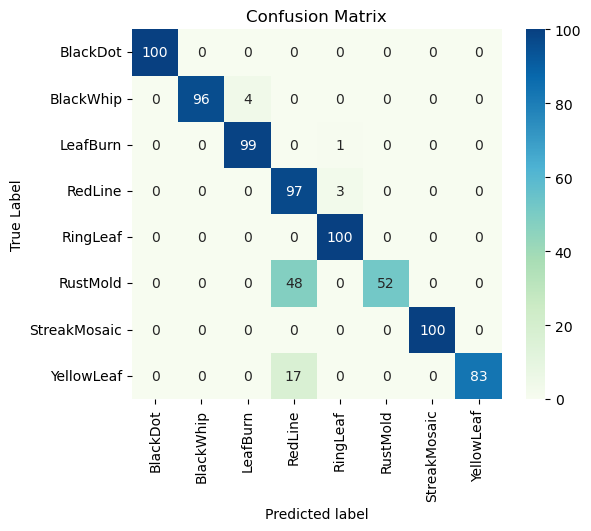

In [34]:
# โหลด MobilenetV2 model มาจาก tensorflow hub
mobilenetModel = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top=False, weights='imagenet')
mobilenetModel.trainable = False

# สร้าง model ใหม่ โดยเพิ่ม layer ต่อจาก model ที่โหลดมา
mobilenetModelModify = Sequential()
mobilenetModelModify.add(mobilenetModel)
mobilenetModelModify.add(Conv2D(128, 3, activation='relu'))
mobilenetModelModify.add(MaxPool2D(2))
mobilenetModelModify.add(Dense(16))
mobilenetModelModify.add(Flatten())
mobilenetModelModify.add(Dense(8, activation='softmax'))

# กำหนดตัวแปรในการ train model
mobilenetModelModify.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy'])
mobilenetModelModify.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
mobilenetPred = mobilenetModelModify.predict(x_test)
mobilenetPred = np.argmax(mobilenetPred ,axis=1)
# print(len(y_pred))
# print(y_pred)

# ฟังก์ชันแปลง array 2d เป็น array 1d เพื่อแปลงค่า label ให้เป็นตัวเลข 0-7
def convert_to_1d_array(array_2d):
    array_1d = []
    for i in range(len(array_2d)):
        array_1d.append(array_2d[i])
    return array_1d

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
mobilenetPredictLabels = convert_to_1d_array(mobilenetPred)
# print(resaultPredictLabels)

# สร้าง array ขนาด 800 ตัวเลข 0 เพื่อเก็บค่า label จริง
true_labels = np.zeros(800, dtype=int)
for i in range(8):
    true_labels[i*100:(i+1)*100] = i
# Print the array
# print(len(true_labels))


# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
confusion_matrix = confusion_matrix(true_labels, mobilenetPredictLabels)
# Accuracy_score
accuracy_score = accuracy_score(true_labels, mobilenetPredictLabels)
# Recall_score
recall_score = recall_score(true_labels, mobilenetPredictLabels, average='macro')
# resaultPredict
f1_score = f1_score(true_labels, mobilenetPredictLabels, average='macro')
# Classification_report
classification_report = classification_report(true_labels, mobilenetPredictLabels)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(accuracy_score)
# print(recall_score)
# print(f1_score)
print(classification_report)

# confusionmatrix
axes = sns.heatmap(confusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')



LeNet-5

Epoch 1/10
100/100 [==============================] - 43s 424ms/step - loss: 0.8536 - accuracy: 0.7000 - val_loss: 0.9006 - val_accuracy: 0.6975
Epoch 2/10
100/100 [==============================] - 42s 418ms/step - loss: 0.1605 - accuracy: 0.9559 - val_loss: 0.7797 - val_accuracy: 0.7900
Epoch 3/10
100/100 [==============================] - 42s 417ms/step - loss: 0.0418 - accuracy: 0.9875 - val_loss: 0.6585 - val_accuracy: 0.8150
Epoch 4/10
100/100 [==============================] - 42s 419ms/step - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.8594 - val_accuracy: 0.8100
Epoch 5/10
100/100 [==============================] - 42s 417ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.9379 - val_accuracy: 0.6775
Epoch 6/10
100/100 [==============================] - 42s 418ms/step - loss: 0.0422 - accuracy: 0.9875 - val_loss: 1.1548 - val_accuracy: 0.8462
Epoch 7/10
100/100 [==============================] - 42s 417ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 1.1117 - val_ac

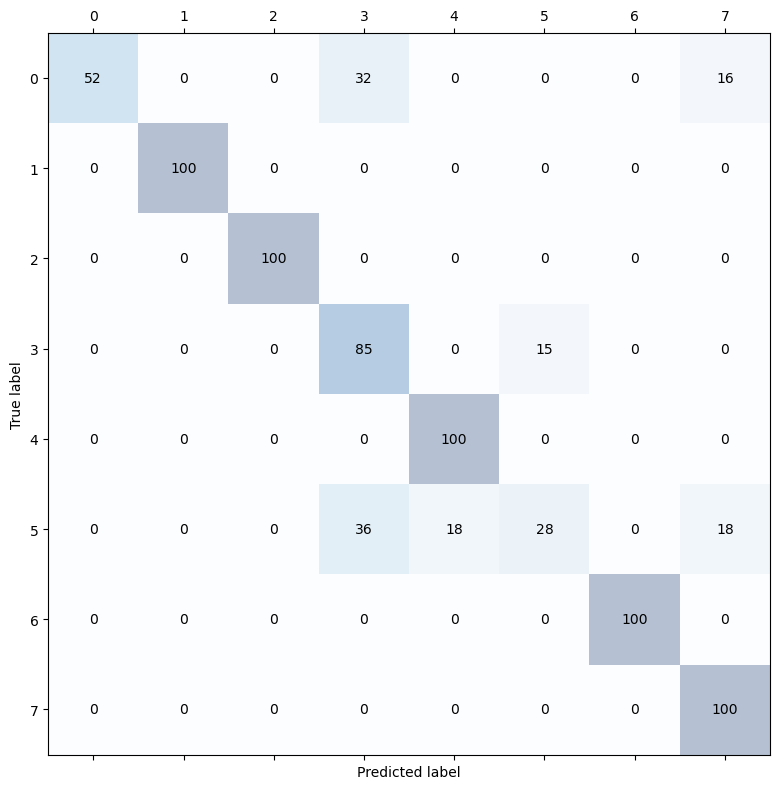

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       0.56      0.85      0.67       100
           4       0.85      1.00      0.92       100
           5       0.65      0.28      0.39       100
           6       1.00      1.00      1.00       100
           7       0.75      1.00      0.85       100

    accuracy                           0.83       800
   macro avg       0.85      0.83      0.81       800
weighted avg       0.85      0.83      0.81       800



Text(0.5, 1.0, 'Confusion Matrix')

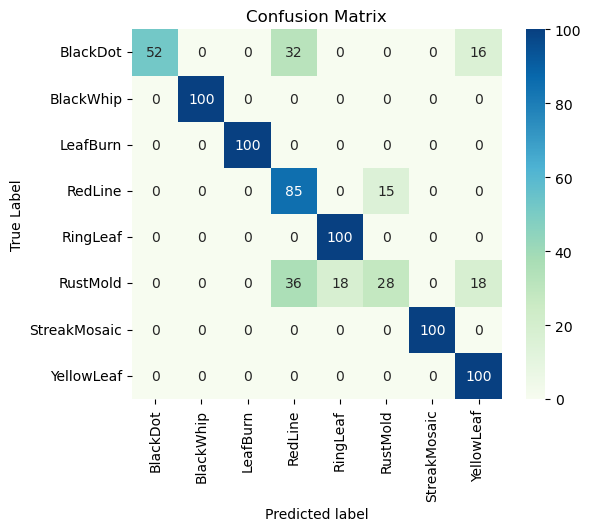

In [35]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

LeNet_5_Model = Sequential()
LeNet_5_Model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Flatten())
LeNet_5_Model.add(Dense(256, activation='relu'))
LeNet_5_Model.add(Dense(84, activation='relu'))
LeNet_5_Model.add(Dense(8, activation='softmax'))

LeNet_5_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet_5_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
LeNet_5_ModelPred = LeNet_5_Model.predict(x_test)
LeNet_5_ModelPred = np.argmax(LeNet_5_ModelPred ,axis=1)
# print(len(LeNet_5_ModelPred))
# print(LeNet_5_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
LeNet_5_ModelPredLabel = convert_to_1d_array(LeNet_5_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
LeNet_confusion_matrix = confusion_matrix(true_labels, LeNet_5_ModelPredLabel)
# Accuracy_score
LeNet_accuracy_score = accuracy_score(true_labels, LeNet_5_ModelPredLabel)
# Recall_score
LeNet_recall_score = recall_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# resaultPredict
LeNet_f1_score = f1_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# Classification_report
LeNet_classification_report = classification_report(true_labels, LeNet_5_ModelPredLabel)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(LeNet_confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(LeNet_confusion_matrix.shape[0]):
    for j in range(LeNet_confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=LeNet_confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(LeNet_classification_report)

# confusionmatrix
axes = sns.heatmap(LeNet_confusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

AlexNet

Epoch 1/10
100/100 [==============================] - 55s 539ms/step - loss: 2.1032 - accuracy: 0.1191 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/10
100/100 [==============================] - 53s 534ms/step - loss: 2.0798 - accuracy: 0.1141 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/10
100/100 [==============================] - 54s 536ms/step - loss: 2.0797 - accuracy: 0.1141 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/10
100/100 [==============================] - 54s 536ms/step - loss: 2.0797 - accuracy: 0.1234 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/10
100/100 [==============================] - 53s 534ms/step - loss: 2.0796 - accuracy: 0.1119 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/10
100/100 [==============================] - 53s 533ms/step - loss: 2.0796 - accuracy: 0.1116 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 7/10
100/100 [==============================] - 53s 535ms/step - loss: 2.0796 - accuracy: 0.1150 - val_loss: 2.0794 - val_ac

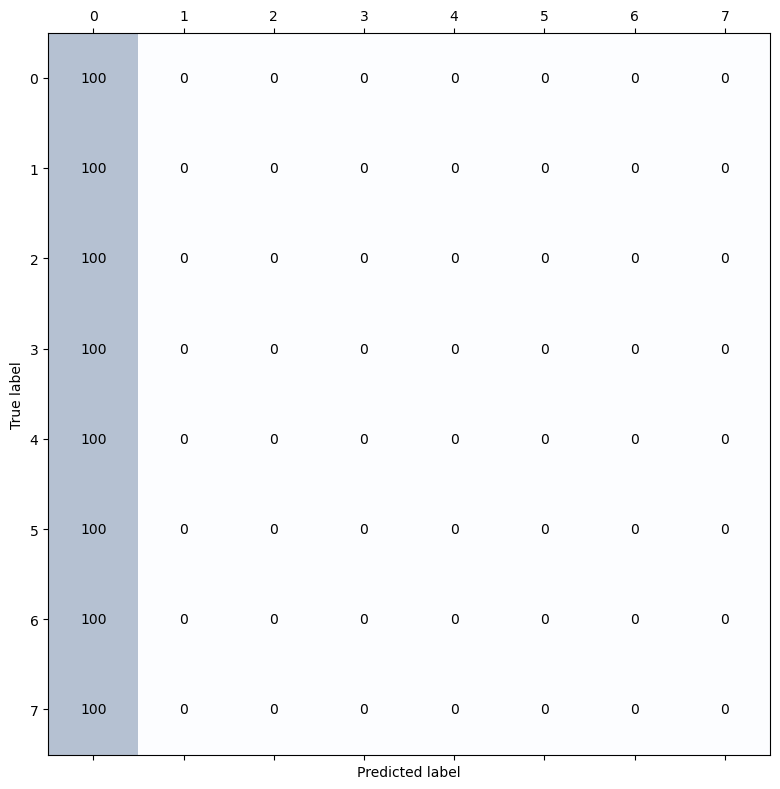

              precision    recall  f1-score   support

           0       0.12      1.00      0.22       100
           1       1.00      0.00      0.00       100
           2       1.00      0.00      0.00       100
           3       1.00      0.00      0.00       100
           4       1.00      0.00      0.00       100
           5       1.00      0.00      0.00       100
           6       1.00      0.00      0.00       100
           7       1.00      0.00      0.00       100

    accuracy                           0.12       800
   macro avg       0.89      0.12      0.03       800
weighted avg       0.89      0.12      0.03       800



Text(0.5, 1.0, 'Confusion Matrix')

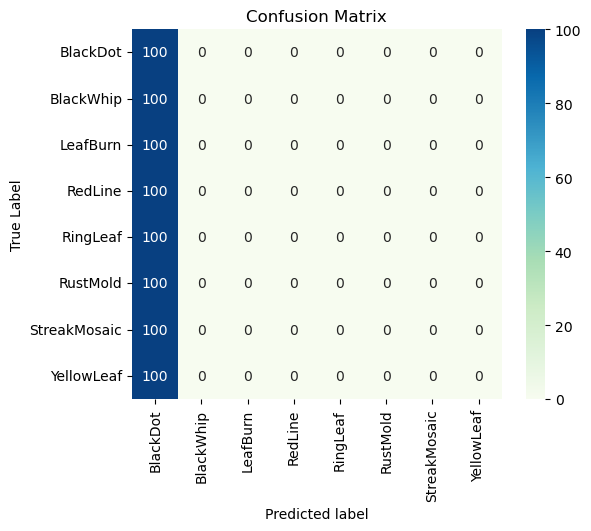

In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

AlexNet_Model = Sequential()
AlexNet_Model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid', input_shape=(128,128,3)))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Flatten())
AlexNet_Model.add(Dense(4096, activation='relu'))
AlexNet_Model.add(Dense(4096, activation='relu'))
AlexNet_Model.add(Dense(8, activation='softmax'))

AlexNet_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
AlexNet_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
AlexNet_ModelPred = AlexNet_Model.predict(x_test)
AlexNet_ModelPred = np.argmax(AlexNet_ModelPred ,axis=1)
# print(len(AlexNet_ModelPred))
# print(AlexNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
AlexNet_ModelPredLabel = convert_to_1d_array(AlexNet_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
AlexNetconfusion_matrix = confusion_matrix(true_labels, AlexNet_ModelPredLabel)
# Accuracy_score
AlexNetaccuracy_score = accuracy_score(true_labels, AlexNet_ModelPredLabel)
# Recall_score
AlexNetrecall_score = recall_score(true_labels, AlexNet_ModelPredLabel, average='macro')
# resaultPredict
AlexNetf1_score = f1_score(true_labels, AlexNet_ModelPredLabel, average='macro' )
# Classification_report
AlexNetlassification_report = classification_report(true_labels, AlexNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(AlexNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(AlexNetconfusion_matrix.shape[0]):
    for j in range(AlexNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=AlexNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(AlexNetlassification_report)

# confusionmatrix
axes = sns.heatmap(AlexNetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')


Inception

Epoch 1/10
100/100 [==============================] - 80s 793ms/step - loss: 1.8259 - accuracy: 0.2763 - val_loss: 1.4637 - val_accuracy: 0.2912
Epoch 2/10
100/100 [==============================] - 78s 783ms/step - loss: 1.3170 - accuracy: 0.4856 - val_loss: 1.2127 - val_accuracy: 0.4988
Epoch 3/10
100/100 [==============================] - 78s 784ms/step - loss: 1.1209 - accuracy: 0.5725 - val_loss: 1.1633 - val_accuracy: 0.4762
Epoch 4/10
100/100 [==============================] - 78s 781ms/step - loss: 1.0363 - accuracy: 0.6069 - val_loss: 1.0749 - val_accuracy: 0.4675
Epoch 5/10
100/100 [==============================] - 78s 783ms/step - loss: 0.8862 - accuracy: 0.6737 - val_loss: 1.0674 - val_accuracy: 0.5725
Epoch 6/10
100/100 [==============================] - 78s 781ms/step - loss: 0.7907 - accuracy: 0.7153 - val_loss: 0.9893 - val_accuracy: 0.5938
Epoch 7/10
100/100 [==============================] - 78s 780ms/step - loss: 0.6620 - accuracy: 0.7616 - val_loss: 1.0671 - val_ac

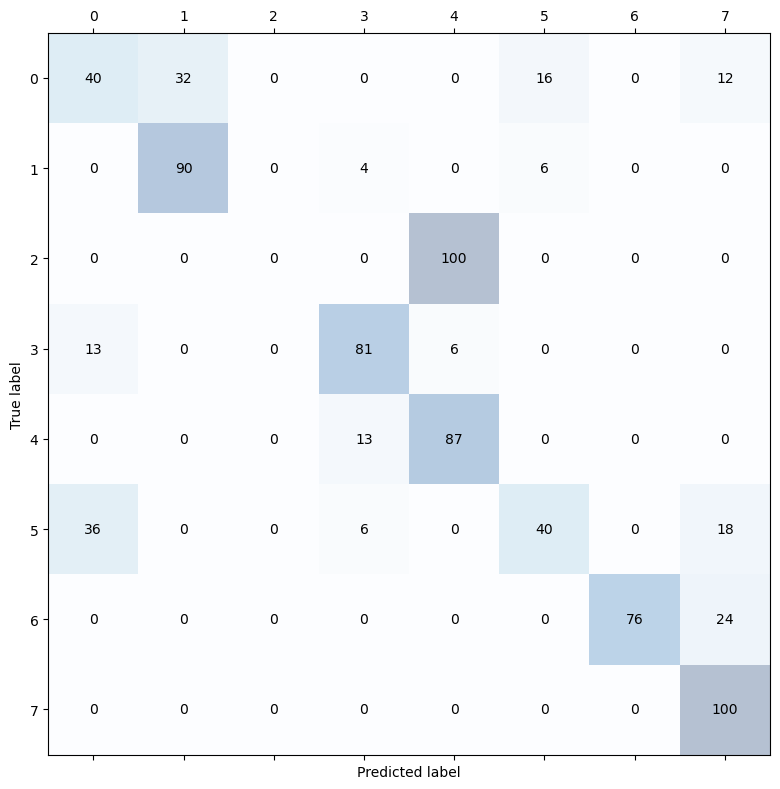

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       100
           1       0.74      0.90      0.81       100
           2       1.00      0.00      0.00       100
           3       0.78      0.81      0.79       100
           4       0.45      0.87      0.59       100
           5       0.65      0.40      0.49       100
           6       1.00      0.76      0.86       100
           7       0.65      1.00      0.79       100

    accuracy                           0.64       800
   macro avg       0.71      0.64      0.60       800
weighted avg       0.71      0.64      0.60       800



Text(0.5, 1.0, 'Confusion Matrix')

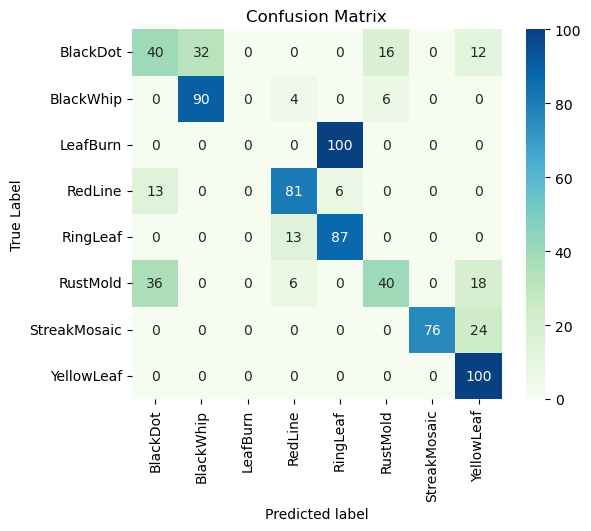

In [37]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report
def InceptionV3(input_shape=(128, 128, 3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((3, 3)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(8, activation='sigmoid'))

    return model

inceptionModel = InceptionV3()
# inceptionModel.summary()

inceptionModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
inception_ModelPred = inceptionModel.predict(x_test)
inception_ModelPred = np.argmax(inception_ModelPred ,axis=1)
# print(len(inception_ModelPred))
# print(inception_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
inception_ModelPredLabel = convert_to_1d_array(inception_ModelPred)
# print(inception_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
inceptionconfusion_matrix = confusion_matrix(true_labels, inception_ModelPredLabel)
# Accuracy_score
inceptionaccuracy_score = accuracy_score(true_labels, inception_ModelPredLabel)
# Recall_score
inceptionrecall_score = recall_score(true_labels, inception_ModelPredLabel, average='macro')
# resaultPredict
inceptionf1_score = f1_score(true_labels, inception_ModelPredLabel, average='macro' )
# Classification_report
inceptionclassification_report = classification_report(true_labels, inception_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(inceptionconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(inceptionconfusion_matrix.shape[0]):
    for j in range(inceptionconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=inceptionconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(inceptionclassification_report)

# confusionmatrix
axes = sns.heatmap(inceptionconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

ResNet

In [38]:
def residual_block(inputs, filters, strides, name):
    """A building block for a ResNet"""
    x = tf.keras.layers.Conv2D(filters, 3, strides=strides, padding='same', name=name+'_conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn1')(x)
    x = tf.keras.layers.ReLU(name=name+'_relu1')(x)

    x = tf.keras.layers.Conv2D(filters, 3, strides=1, padding='same', name=name+'_conv2')(x)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn2')(x)

    shortcut = tf.keras.layers.Conv2D(filters, 1, strides=strides, padding='same', name=name+'_shortcut')(inputs)
    shortcut = tf.keras.layers.BatchNormalization(name=name+'_shortcut_bn')(shortcut)

    x = tf.keras.layers.add([x, shortcut], name=name+'_add')
    x = tf.keras.layers.ReLU(name=name+'_relu2')(x)
    return x

def ResNet(input_shape, num_classes):
    """A simple ResNet architecture"""
    inputs = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', name='conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='bn1')(x)
    x = tf.keras.layers.ReLU(name='relu1')(x)
    x = tf.keras.layers.MaxPool2D(3, strides=2, padding='same', name='maxpool')(x)

    x = residual_block(x, 64, 1, name='block1')
    x = residual_block(x, 128, 2, name='block2')
    x = residual_block(x, 256, 2, name='block3')
    x = residual_block(x, 512, 2, name='block4')

    x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax', name='fc')(x)

    model = tf.keras.models.Model(inputs, x, name='ResNet')
    return model

ResNetModel = ResNet((128, 128, 3), 8)
# ResNetModel.summary()

ResNetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNetModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
ResNet_ModelPred = ResNetModel.predict(x_test)
ResNet_ModelPred = np.argmax(ResNet_ModelPred ,axis=1)
# print(len(ResNet_ModelPred))
# print(ResNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
ResNet_ModelPredLabel = convert_to_1d_array(ResNet_ModelPred)
# print(ResNet_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
ResNetconfusion_matrix = confusion_matrix(true_labels, ResNet_ModelPredLabel)
# Accuracy_score
ResNetaccuracy_score = accuracy_score(true_labels, ResNet_ModelPredLabel)
# Recall_score
ResNetrecall_score = recall_score(true_labels, ResNet_ModelPredLabel, average='macro')
# resaultPredict
ResNetf1_score = f1_score(true_labels, ResNet_ModelPredLabel, average='macro' )
# Classification_report
ResNetclassification_report = classification_report(true_labels, ResNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(ResNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(ResNetconfusion_matrix.shape[0]):
    for j in range(ResNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=ResNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(ResNetaccuracy_score)
# print(ResNetrecall_score)
# print(ResNetf1_score)
print(ResNetclassification_report)

axes = sns.heatmap(ResNetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

Epoch 1/10
100/100 [==============================] - 71s 665ms/step - loss: 0.2649 - accuracy: 0.9203 - val_loss: 16.0525 - val_accuracy: 0.1250
Epoch 2/10
100/100 [==============================] - 66s 661ms/step - loss: 0.1087 - accuracy: 0.9641 - val_loss: 14.4787 - val_accuracy: 0.1250
Epoch 3/10
100/100 [==============================] - 66s 663ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 11.9085 - val_accuracy: 0.1250
Epoch 4/10
100/100 [==============================] - 66s 662ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 4.7921 - val_accuracy: 0.2962
Epoch 5/10
100/100 [==============================] - 66s 664ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 3.9000 - val_accuracy: 0.3400
Epoch 6/10
100/100 [==============================] - 66s 664ms/step - loss: 0.0361 - accuracy: 0.9903 - val_loss: 15.2790 - val_accuracy: 0.1450
Epoch 7/10
100/100 [==============================] - 66s 663ms/step - loss: 0.0311 - accuracy: 0.9891 - val_loss: 4.8280 - va

In [ ]:
testImgPath = './ImagesDataset/Test/BlackDot/BlackDotTest (54).jpg'
imgori = cv2.imread(testImgPath)
imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
img = cv2.resize(imgori ,(128,128))
rimg = np.array(img)
rimg = rimg.astype('float32')
rimg /= 255.00
rimg = np.reshape(rimg ,(1,128,128,3))
predict = mobilenetModelModify.predict(rimg)
label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
result = label[np.argmax(predict)]
print(predict)
print(result)


1/1 [==============================] - 1s 1s/step
[[6.8398231e-01 3.9961363e-09 6.0777668e-02 3.1484463e-03 2.5208575e-01
  2.9404848e-06 8.7036864e-07 1.9895556e-06]]
BlackDot
